### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data Set

In [3]:
df = pd.read_csv('C:/Users/valej/Desktop/DATA-765/HWs/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
var_dict={'credit.policy':'1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.',
          'purpose':'The purpose of the loan (takes values “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other',
         'int.rate':'The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.',
         'installment':'The monthly installments ($) owed by the borrower if the loan is funded.',
         'log.annual.inc':'The natural log of the self-reported annual income of the borrower.',
         'dti':'The debt-to-income ratio of the borrower (amount of debt divided by annual income).',
         'fico':'The FICO credit score of the borrower.',
         'days.with.cr.line':'The number of days the borrower has had a credit line.',
         'revol.bal':'The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).',
         'revol.util':'The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).',
         'inq.last.6mths':'The borrower’s number of inquiries by creditors in the last 6 months.',
         'delinq.2yrs':'The number of times the borrower had been 30+ days past due on a payment in the past 2 years.',
         'pub.rec':'The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).',
         'not.fully.paid':'1 for not fully paid/default , and 0 otherwise.'}

In [5]:
pd.set_option('display.max_colwidth', -1)
var_dict_df = pd.DataFrame(var_dict.items(),columns=['Variable','Description'])
var_dict_df.style.set_properties(**{'text-align': 'left'})

,Variable,Description
0,credit.policy,"1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise."
1,purpose,"The purpose of the loan (takes values “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other"
2,int.rate,"The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates."
3,installment,The monthly installments ($) owed by the borrower if the loan is funded.
4,log.annual.inc,The natural log of the self-reported annual income of the borrower.
5,dti,The debt-to-income ratio of the borrower (amount of debt divided by annual income).
6,fico,The FICO credit score of the borrower.
7,days.with.cr.line,The number of days the borrower has had a credit line.
8,revol.bal,The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).
9,revol.util,The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Exploratory Data Analysis

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


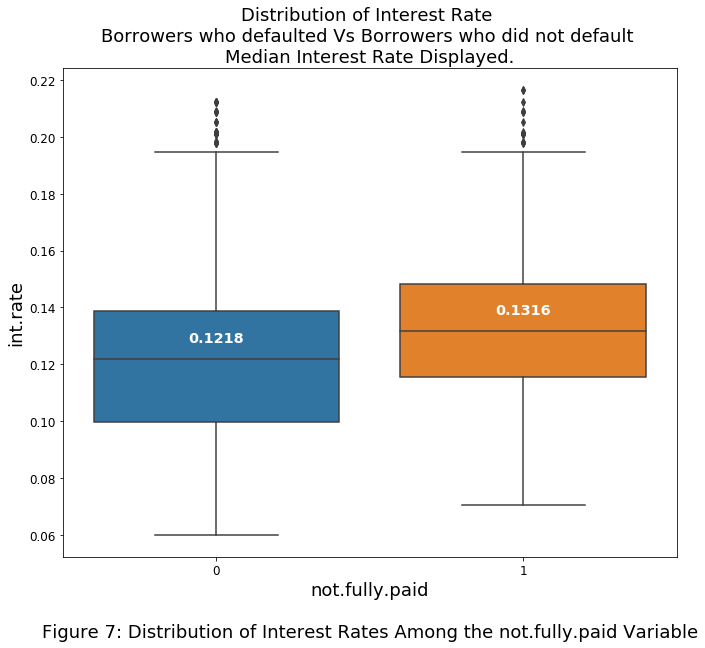

In [8]:
plt.figure(figsize=(11,9))
boxPlt = sns.boxplot(x='not.fully.paid',y='int.rate',data=df)
medians=df.groupby(['not.fully.paid'])['int.rate'].median()
vertical_offset = df['int.rate'].median() * 0.05
for xtick in boxPlt.get_xticks():
    boxPlt.text(xtick, medians[xtick]+ vertical_offset, medians[xtick],
               horizontalalignment='center',size='x-large', color = 'w' , weight= 'semibold')
plt.title("Distribution of Interest Rate \n"+
          "Borrowers who defaulted Vs Borrowers who did not default \n"+
          "Median Interest Rate Displayed.", fontsize = 18);
plt.xlabel('not.fully.paid\n\n'+
           'Figure 7: Distribution of Interest Rates Among the not.fully.paid Variable',
           fontsize = 18)
plt.ylabel('int.rate',fontsize = 18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

The median interest rate among borrowers who defaulted on their loans is higher. 

In [9]:
b

NameError: name 'b' is not defined

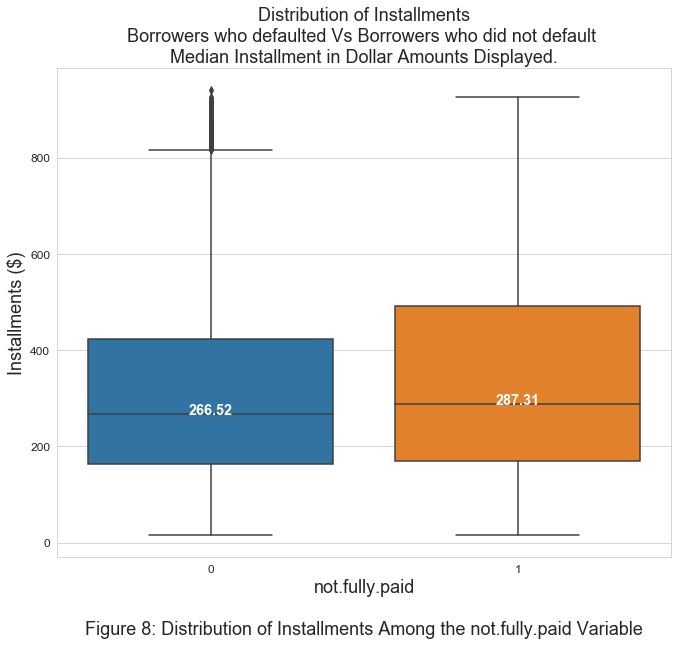

In [13]:
plt.figure(figsize=(11,9))
boxPlt = sns.boxplot(x='not.fully.paid',y='installment',data=df)
medians=df.groupby(['not.fully.paid'])['installment'].median()
vertical_offset = df['dti'].median() * 0.05
for xtick in boxPlt.get_xticks():
    boxPlt.text(xtick, medians[xtick]+ vertical_offset, medians[xtick],
               horizontalalignment='center',size='x-large', color = 'w' , weight= 'semibold')
plt.title("Distribution of Installments\n"+
          "Borrowers who defaulted Vs Borrowers who did not default \n"+
          "Median Installment in Dollar Amounts Displayed.", fontsize = 18);
plt.xlabel('not.fully.paid\n\n'+
           'Figure 8: Distribution of Installments Among the not.fully.paid Variable',
           fontsize = 18)
plt.ylabel('Installments ($)',fontsize = 18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

<bound method Axes.annotate of <matplotlib.axes._subplots.AxesSubplot object at 0x000001E661A87E88>>

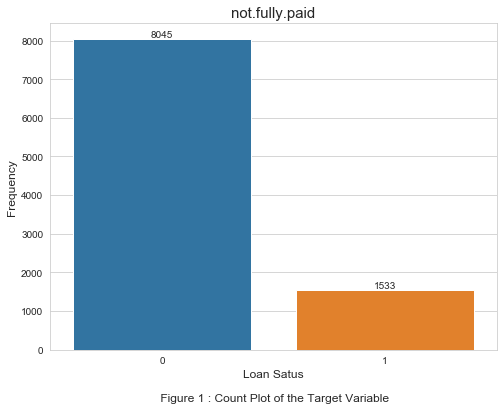

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
ax=sns.countplot(x='not.fully.paid',data=df)
plt.title("not.fully.paid",fontsize=15)
plt.xlabel("Loan Satus\n\n Figure 1 : Count Plot of the Target Variable",fontsize= 12)
plt.ylabel("Frequency",fontsize= 12)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()),(p.get_x()+0.35,p.get_height()+50),)
ax.annotate

#### Distribution of the FICO score among borrowers who met the underwriter criteria and borrowers that did not. 

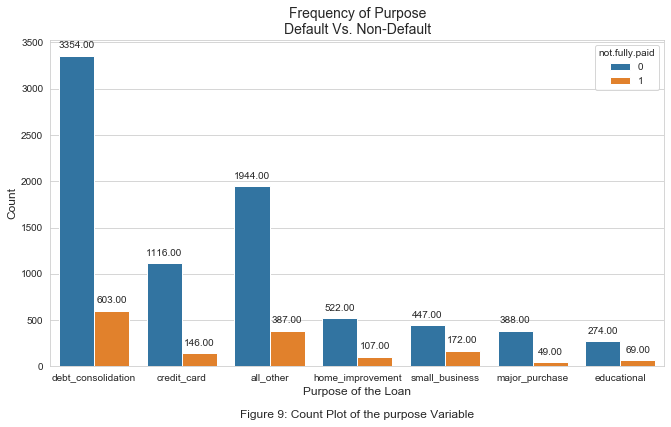

In [15]:
plt.figure(figsize=(11,6))
cntplot= sns.countplot(x='purpose',hue='not.fully.paid',data=df)
for p in cntplot.patches:
    cntplot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Frequency of Purpose\nDefault Vs. Non-Default',fontsize=14)
plt.xlabel('Purpose of the Loan\n\nFigure 9: Count Plot of the purpose Variable',fontsize=12)
plt.ylabel('Count',fontsize=12);

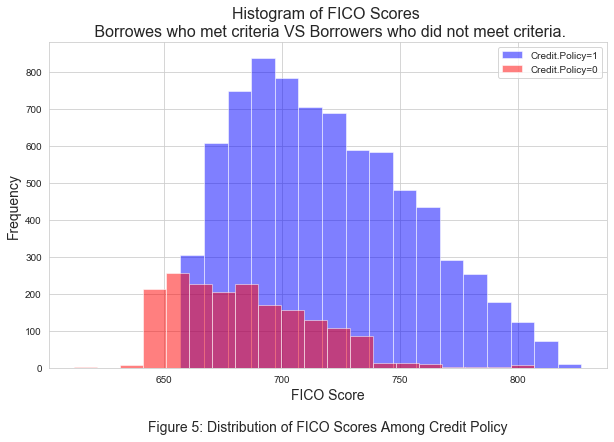

In [42]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=20,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=20,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO Score\n\nFigure 5: Distribution of FICO Scores Among Credit Policy',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Histogram of FICO Scores \n Borrowes who met criteria VS Borrowers who did not meet criteria.',fontsize=16);

#### Distribution of the Purpose of the loan among borrowers who defaulted and borroweds who did not. 

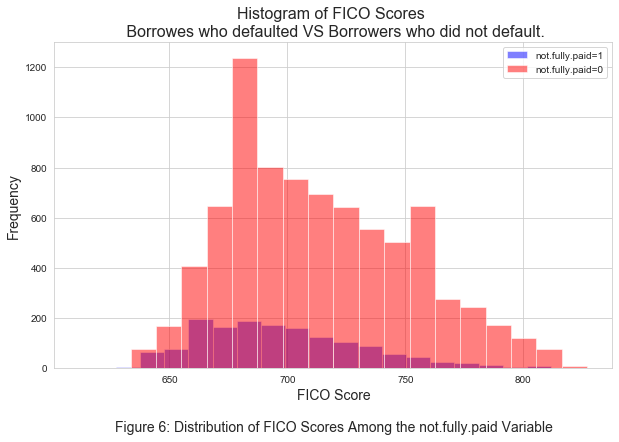

In [44]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=20,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=20,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO Score\n\nFigure 6: Distribution of FICO Scores Among the not.fully.paid Variable',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Histogram of FICO Scores \n Borrowes who defaulted VS Borrowers who did not default.',fontsize=16);

#### Correlation Matix - All Variables

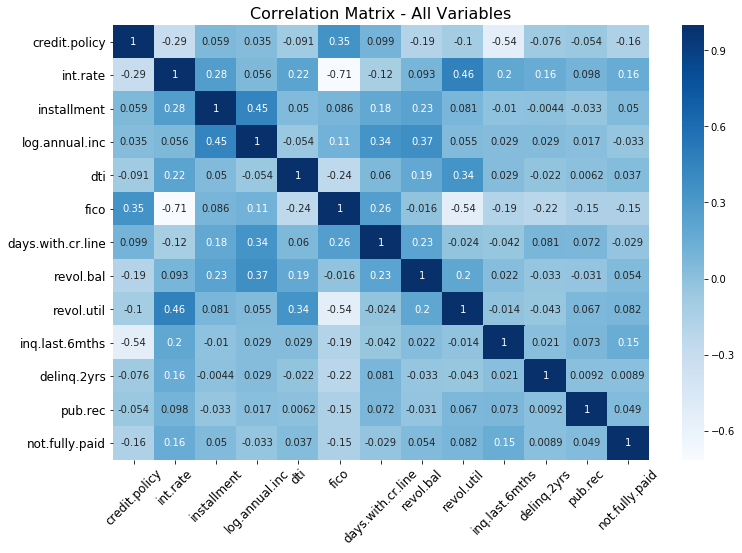

In [9]:
df_corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,cmap='Blues',annot=True)
plt.title('Correlation Matrix - All Variables',fontsize=16)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12);

By looking at the above matrix, i noticed 3 strong relationships:
* The correlation between the borrowers' FICO score and the interest rate on the loan.
* The correlation between the number of inquiries in the last 6 months and credit policy.
* The correlation between the revolving line of utilization rate and the borrowers' FICO score 

#### Plotting Variable Relationships With High correlation. 

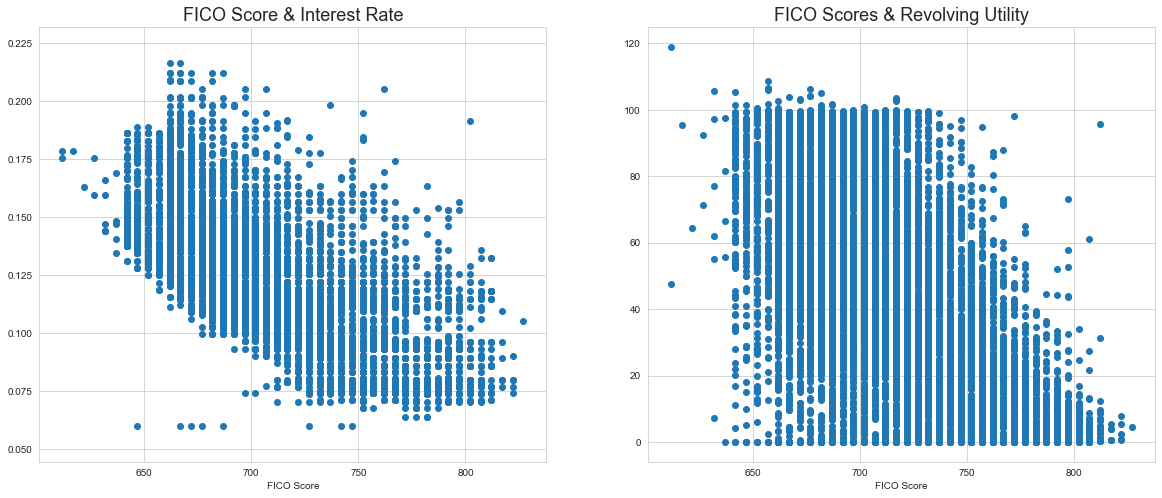

In [25]:
fig,axes= plt.subplots(1,2,figsize=(20,8))
axes[0].scatter('fico','int.rate',data=df)
axes[0].set_title('FICO Score & Interest Rate',fontsize=18)
axes[1].scatter('fico','revol.util',data=df)
axes[1].set_title('FICO Scores & Revolving Utility',fontsize=18)
for ax in axes.flat:
    ax.set(xlabel='FICO Score');

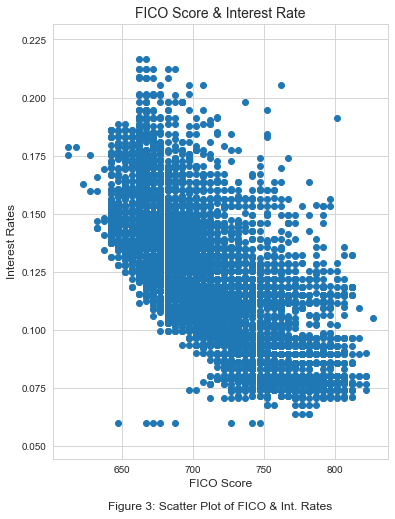

In [38]:
plt.figure(figsize=(6,8))
plt.scatter('fico','int.rate',data=df)
plt.title('FICO Score & Interest Rate',fontsize=14)
plt.xlabel('FICO Score\n\nFigure 3: Scatter Plot of FICO & Int. Rates',fontsize=12)
plt.ylabel('Interest Rates', fontsize=12);

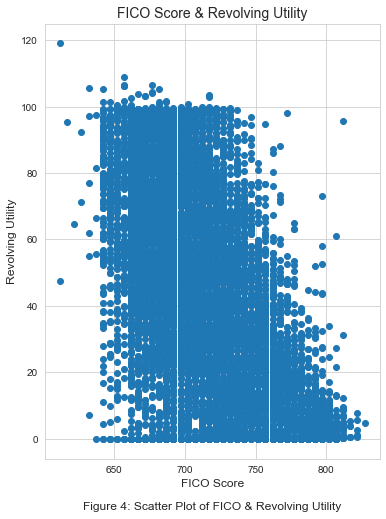

In [43]:
plt.figure(figsize=(6,8))
plt.scatter('fico','revol.util',data=df)
plt.title('FICO Score & Revolving Utility',fontsize=14)
plt.xlabel('FICO Score\n\nFigure 4: Scatter Plot of FICO & Revolving Utility',fontsize=12)
plt.ylabel('Revolving Utility', fontsize=12);

In [85]:
pd.crosstab(df['credit.policy'],
            df['purpose'],
            margins=True, 
            margins_name="Total",                       
            normalize=('columns'))

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,Total
credit.policy,,,,,,,,
0,0.212784,0.191759,0.185494,0.259475,0.18601,0.15103,0.200323,0.19503
1,0.787216,0.808241,0.814506,0.740525,0.81399,0.84897,0.799677,0.80497


In [60]:
purposeDefaultCrossTab=pd.crosstab(df['not.fully.paid'],
            df['purpose'],
            margins=True, 
            margins_name="Total",                       
            normalize=('columns'))
purposeDefaultCrossTab

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,Total
not.fully.paid,,,,,,,,
0,0.833977,0.884311,0.847612,0.798834,0.829889,0.887872,0.722132,0.839946
1,0.166023,0.115689,0.152388,0.201166,0.170111,0.112128,0.277868,0.160054
